# Image Segmentation

In this Notebook, we explore four types of image processing algorithms that aid with Image Segmentation. The first will be Global Thresholding and the second will be Local Thresholding. Thirdly we look at Edge-Based Segmentation and Lastly we look at Region-Based Segmentation. These will all be compared via the accuracy of the area that each image yields.

## Global Thresholding

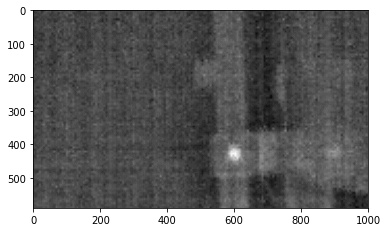

In [109]:
#Initializations
import cv2
import numpy as np
from skimage import io
from matplotlib import pyplot as plt

#Loading the Image from Desktop
image = io.imread('C:/Users/user/Desktop/60_4.jpg')

from skimage.color import rgb2gray           # Convert colour image to viridis (default greyscale) 
virid = rgb2gray(image)
virid.max()                                  # Indication of the maximum value of the image value
cropped = virid[0:590,200:1200]              # Cropping out unwanted parts of the image
#plt.imshow(virid)
plt.imshow(cropped)
#cropped[300,100]

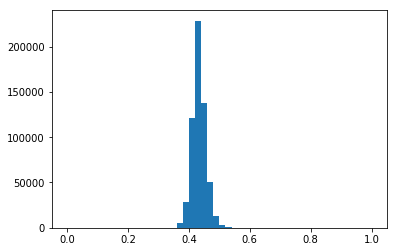

In [75]:
img = cropped
plt.hist(img.ravel(),50,[0,1]) # Plotting the Histogram so that we can get a good idea of the threshold value
plt.show()

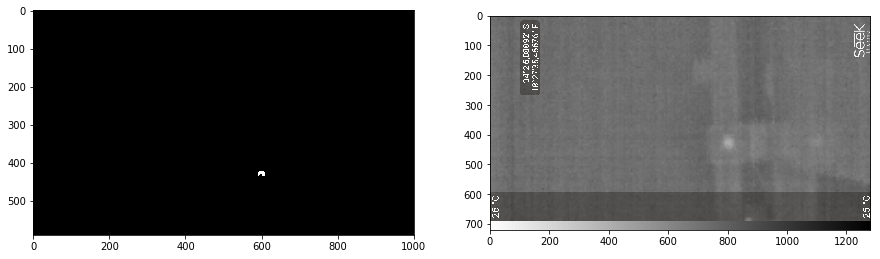

In [76]:
thresh = 0.65                                                     # Choosing an arbitrary value as a threshold
new = cropped > thresh
fig, (ax_jet, ax_gray) = plt.subplots(ncols=2, figsize = (15,15)) # Plotting two figures
ax_jet.imshow(new, cmap='gray')
ax_gray.imshow(image);

In [77]:
# Creating a counter to count the number of white pixels for the anomaly
t = 0
for i in range(new.shape[0]):
    for j in range(new.shape[1]):
        if new[i,j] == 1:
            t = t + 1
print(t)

180


In [101]:
# Calculating the area of the anomaly
import math
OD = 3750
Area = ((4*OD**2)*(math.tan(math.radians(16))*math.tan(math.radians(8.4)))/921600)*t
print(Area)

465.1927145338068


## Adaptive Thresholding

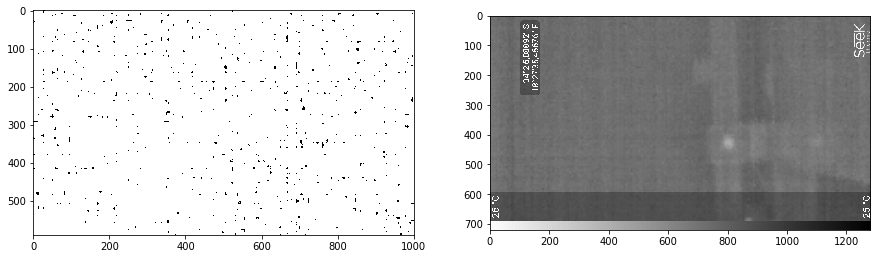

In [80]:
# Initializations
from skimage.filters import threshold_otsu, threshold_local
from skimage import io
from skimage.color import rgb2gray # Convert colour image to viridis (default greyscale) 
from matplotlib import pyplot as plt

#Insert the image
image1 = io.imread('C:/Users/user/Desktop/60_4.jpg') 
image = rgb2gray(image1)

#crop image to remove unwated figures 
virid = rgb2gray(image)
cropped = virid[0:590,200:1200]

# Utilization of Otsu's Method
global_thresh = threshold_otsu(cropped)

# Application of the Adaptive threshold function
block_size = 39 
local_thresh = threshold_local(cropped, block_size, offset=0.02)
binary_local = cropped > local_thresh

#Plotting the Results
fig, (ax_jet, ax_gray) = plt.subplots(ncols=2, figsize = (15,15))
ax_jet.imshow(binary_local, cmap='gray')
ax_gray.imshow(image);

In [103]:
# Creating a counter to count the number of white pixels for the anomaly
t = 0
for i in range(binary_local.shape[0]):
    for j in range(binary_local.shape[1]):
        if binary_local[i,j] == 1:
            t = t + 1
print(t)

582099


In [104]:
# Calculating the area of the anomaly
import math
OD = 3750
Area = ((4*OD**2)*(math.tan(math.radians(16))*math.tan(math.radians(8.4)))/921600)*t
print(Area)

1504378.966318969


# Edge-Based Segmentation

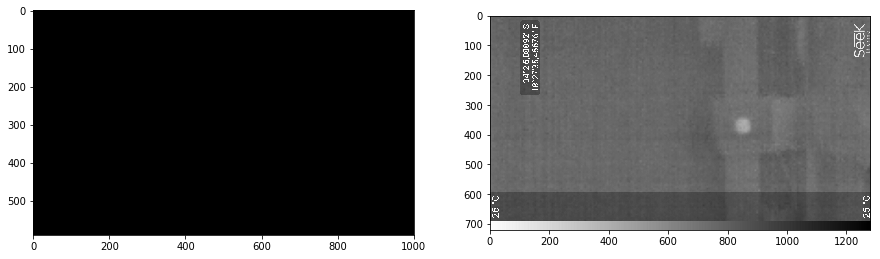

In [94]:
#Initializations
from skimage.feature import canny
from scipy import ndimage as ndi
from skimage import morphology

#Insert the image
image1 = io.imread('C:/Users/user/Desktop/60_3.jpg') 
image = rgb2gray(image1)

#crop image to remove unwated figures 
virid = rgb2gray(image)
cropped = virid[0:590,200:1200]

edges = canny(cropped) # Applying the Canny Filter to define the edges
filled = ndi.binary_fill_holes(edges) # Filling any defined holes
cleaned = morphology.remove_small_objects(filled,0) # Cleaning the image from high resolution noise

#Plotting the Results
fig, (ax_jet, ax_gray) = plt.subplots(ncols=2, figsize = (15,15))
ax_jet.imshow(cleaned, cmap='gray')
ax_gray.imshow(image);

In [105]:
# Creating a counter to count the number of white pixels for the anomaly
t = 0
for i in range(cleaned.shape[0]):
    for j in range(cleaned.shape[1]):
        if cleaned[i,j] == 1:
            t = t + 1
print(t)

0


In [106]:
# Calculating the area of the anomaly
import math
OD = 3750
Area = ((4*OD**2)*(math.tan(math.radians(16))*math.tan(math.radians(8.4)))/921600)*t
print(Area)

0.0


## Region-Based Segmentation

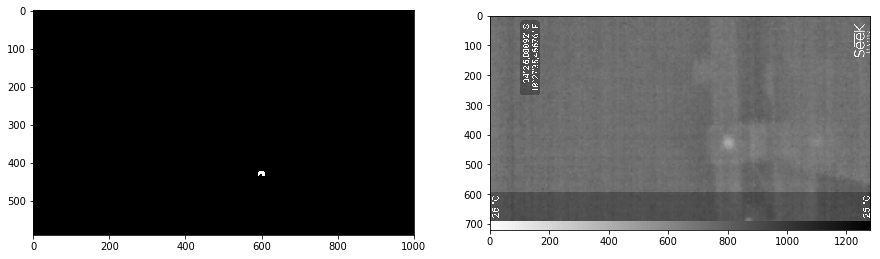

In [100]:
#Initializations
from skimage.filters import sobel

#Insert the image
image1 = io.imread('C:/Users/user/Desktop/60_4.jpg') 
image = rgb2gray(image1)

#crop image to remove unwated figures 
virid = rgb2gray(image)
cropped = virid[0:590,200:1200]

elevation_map = sobel(cropped) # Creating the gradient
global_thresh = threshold_otsu(cropped)
markers = np.zeros_like(cropped) # Creating a new image set to 0 to store the marker image
markers[cropped < 0.65] = 1 # Applying markers for the threshold for binarization
markers[cropped > 0.65] = 2 # Applying markers for the threshold for binarization

segmentation = morphology.watershed(elevation_map, markers) #Application of The Watershed transform

#Plotting the Results
fig, (ax_jet, ax_gray) = plt.subplots(ncols=2, figsize = (15,15))
ax_jet.imshow(segmentation, cmap='gray')
ax_gray.imshow(image);

In [107]:
# Creating a counter to count the number of white pixels for the anomaly
t = 0
for i in range(segmentation.shape[0]):
    for j in range(segmentation.shape[1]):
        if segmentation[i,j] == 2:
            t = t + 1
print(t)

180


In [111]:
# Calculating the area of the anomaly
import math
OD = 750
Area = ((4*OD**2)*(math.tan(math.radians(16))*math.tan(math.radians(8.4)))/921600)*27350
print(Area)

2827.337942777692


Given the results above, the Global thresholding and Region-Based Segmentaion have resulted in the best algorithms for are detection and will thus be used for the segmentation.